<a href="https://colab.research.google.com/github/jsgf04/TdR_Physics_behind_skiing/blob/main/Grafiques_mov_rect_amb_vent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! sudo apt-get install texlive-latex-recommended 
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended  
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
! unzip type1cm.zip -d /tmp/type1cm 
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
! sudo texhash

In [ ]:
!apt install cm-super

Massa de l'esquiador (kg): 80
Velocitat del vent (m/s): 20
Coeficient de fricció cinètica: 0.02
Coeficient de fricció estàtica: 0.04
Inclinació de la pista (º): 20
Temps final (s): 30
Velocitat inicial (m/s): 0



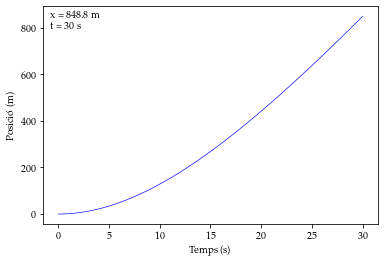

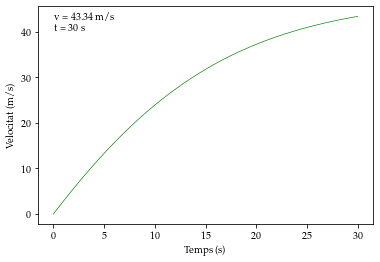

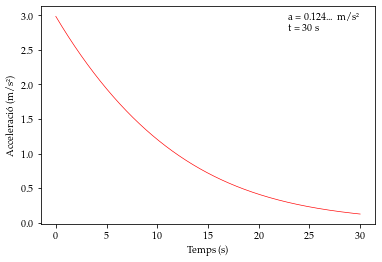

In [18]:
import matplotlib
plt.rcParams.update({"text.usetex": True,"font.family": "serif","font.serif": ["Palatino"],})
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin,cos,sign,sqrt
from scipy.integrate import solve_ivp


g = 9.807
m = float(input("Massa de l'esquiador (kg): "))
w = float(input("Velocitat del vent (m/s): "))
mu_kinetic = float(input("Coeficient de fricció cinètica: "))
mu_static = float(input("Coeficient de fricció estàtica: "))
k = (0.43 * 0.255 * 1.01178) / 2
alpha_degrees = float(input("Inclinació de la pista (º): "))
alpha_rad = np.radians(alpha_degrees)

def equations(t,y):
    dy=np.zeros([3])
    # 0 Pos
    # 1 Vel
    # 2 Acc
    dy[0] = y[1]
    dy[1] = y0[2]
    dy[1] = g*np.sin(alpha_rad)-mu_kinetic*g*np.cos(alpha_rad)-(k/m)*(y[1]+w)**2
    dy[2] = -((2*k*y[2])/m)*(2*y[1] + w*y[2])
    

    return dy

final_time = float(input("Temps final (s): "))
time = np.linspace(0, final_time, 100000)
initial_velocity = float(input("Velocitat inicial (m/s): "))
initial_acc = g*np.sin(alpha_rad)-mu_static*g*np.cos(alpha_rad)
y0 = [0.0, initial_velocity, initial_acc]
print("")

y = solve_ivp(equations, (0,final_time), y0, method='RK45', t_eval=time, rtol=1e-12, atol=1e-24)

t, pos, vel, acc = y.t, y.y[0], y.y[1], y.y[2]

expr= 'm/s\N{SUPERSCRIPT TWO}'
fig, ax = plt.subplots()
trans = ax.transAxes

plt.plot(t, pos.T,"b",linewidth = 0.65)
plt.text(0.02, 0.95, "x = "+str(round(pos[-1], 1))+" m", transform=trans, fontsize=10)
plt.text(0.02, 0.9, "t = "+str(int(final_time))+" s", transform=trans, fontsize=10)
plt.xlabel("Temps (s)")
plt.ylabel("Posició (m)")
plt.show()


plt.plot(t, vel.T,"g",linewidth = 0.65)
plt.text(0.00005, 0.95, "v = "+str(round(vel[-1], 2))+" m/s", transform=trans, fontsize=10)
plt.text(0.00005, 0.9, "t = "+str(int(final_time))+" s", transform=trans, fontsize=10)
plt.xlabel("Temps (s)")
plt.ylabel("Velocitat (m/s)")
plt.show()

plt.plot(t, acc.T,"r",linewidth = 0.65)
plt.text(0.7, 0.95, "a = "+str(round(acc[-1], 3))+"... " +expr, transform=trans, fontsize=10)
plt.text(0.7, 0.9, 't = '+str(int(final_time))+' s', transform=trans, fontsize=10)
plt.xlabel("Temps (s)")
plt.ylabel("Acceleració ("+expr+")")
plt.show()
